# 04 - Bayesian Logistic Regression with PyMC


In [1]:

import pymc as pm
import arviz as az
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load processed data
df = pd.read_csv("../data/processed_fraud.csv")

# Define features and target
X = df.drop(columns=["isFraud"])
y = df["isFraud"].values

# Standardize features
X = (X - X.mean()) / X.std()

# Subsample for speed
X_sub, _, y_sub, _ = train_test_split(X, y, stratify=y, train_size=5000, random_state=42)

In [3]:
with pm.Model() as logistic_model:
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    coefs = pm.Normal("coefs", mu=0, sigma=1, shape=X_sub.shape[1])
    logits = intercept + pm.math.dot(X_sub, coefs)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_sub)

    # Sampling returns InferenceData object directly
    idata = pm.sample(1000, tune=1000, chains=2, target_accept=0.9, random_seed=42)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, coefs]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 166 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


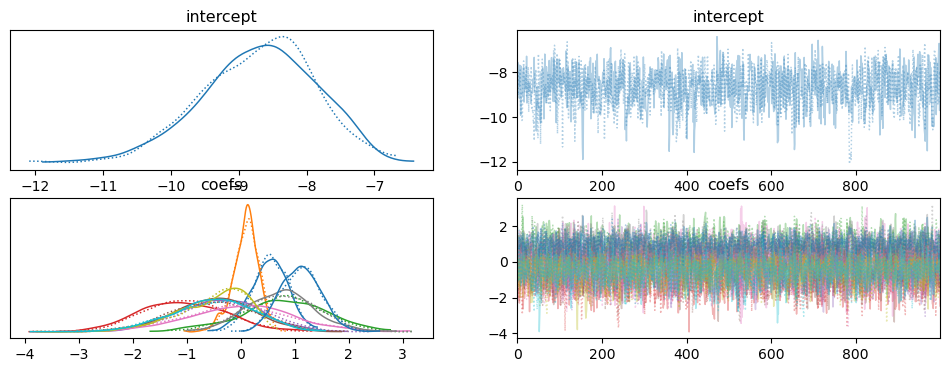

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-8.718,0.860,-10.314,-7.184,0.027,0.022,1094.0,1055.0,1.0
coefs[0],0.543,0.336,-0.160,1.115,0.008,0.008,1850.0,1070.0,1.0
coefs[1],0.090,0.240,-0.414,0.501,0.008,0.007,847.0,908.0,1.0
coefs[2],0.785,0.770,-0.761,2.193,0.023,0.016,1093.0,1008.0,1.0
coefs[3],-1.051,0.792,-2.419,0.540,0.024,0.018,1119.0,1076.0,1.0
coefs[4],-0.369,0.788,-1.750,1.177,0.026,0.016,950.0,1381.0,1.0
coefs[5],-0.514,0.793,-1.964,1.013,0.027,0.017,889.0,891.0,1.0
coefs[6],-0.031,0.976,-1.835,1.839,0.020,0.025,2503.0,1357.0,1.0
coefs[7],0.751,0.635,-0.425,1.922,0.019,0.013,1143.0,1310.0,1.0
coefs[8],-0.532,0.656,-1.715,0.503,0.019,0.018,1398.0,1090.0,1.0


In [4]:
# Summarize posterior
az.plot_trace(idata, var_names=["intercept", "coefs"])
plt.show()

az.summary(idata, var_names=["intercept", "coefs"])